# Seeding CaImAn with a manual mask and using a structural channel for motion correction

This notebook aims to show how to use CaImAn for the following two use cases:

- How to perform motion correction on a structural (red) channel and apply the inferred shifts to the functional channel (green).
- How to use manual binary masks to seed the CNMF algorithm, including an approach for automatic segmentation of a structural channel. 

This notebook will only focus on these points while building upon CaImAn's demo pipeline. For a general demonstration of CaImAn's pipeline, please refer to the [general pipeline demo](./demo_pipeline.ipynb) notebook.

Note that using information from a structural channel does not guarantee improved performance in terms of motion correction and cell identification. Structural channels might give poorer motion correction results depending on the SNR, and might express a different set of neurons compared to the functional channel.

Dataset courtesy of Tolias lab (Baylor College of Medicine)

2024-07-12 17:28:45.828717: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Loading BokehJS ...

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
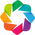

In [1]:
import bokeh.plotting as bpl
from IPython import get_ipython
import logging
import matplotlib.pyplot as plt
import numpy as np
import cv2

from glob import glob

try:
    cv2.setNumThreads(0)
except():
    pass

try:
    if __IPYTHON__:
        get_ipython().run_line_magic('load_ext', 'autoreload')
        get_ipython().run_line_magic('autoreload', '2')
except NameError:
    pass

logging.basicConfig(format=
                          "%(relativeCreated)12d [%(filename)s:%(funcName)20s():%(lineno)s] [%(process)d] %(message)s",
                    # filename="/tmp/caiman.log",
                    level=logging.WARNING)

import caiman as cm
from caiman.motion_correction import MotionCorrect
from caiman.source_extraction.cnmf import cnmf as cnmf
from caiman.source_extraction.cnmf import params as params
from caiman.utils.utils import download_demo
from caiman.utils.visualization import plot_contours, nb_view_patches, nb_plot_contour
import holoviews as hv

bpl.output_notebook()
hv.notebook_extension('bokeh')

### Select file(s) from structural channel to be motion corrected

The `download_demo` function will download the specific file for you and return the complete path to the file which will be stored in your `caiman_data` directory. If you adapt this demo for your data make sure to pass the complete path to your file(s). Remember to pass the `fnames` variable as a list.

In [2]:
fname_red = [download_demo('gmc_960_30mw_00001_red.tif')]   # filename to be processed

## Setup motion correction object

In [5]:
fr = 30             # imaging rate in frames per second
dxy = (1., 1.)      # spatial resolution in x and y in (um per pixel)
                    # note the lower than usual spatial resolution here
max_shift_um = (12., 12.)       # maximum shift in um
patch_motion_um = (100., 100.)  # patch size for non-rigid correction in um

pw_rigid = True       # flag to select rigid vs pw_rigid motion correction
max_shifts = [int(a/b) for a, b in zip(max_shift_um, dxy)]
strides = tuple([int(a/b) for a, b in zip(patch_motion_um, dxy)])
overlaps = (24, 24)
max_deviation_rigid = 3

mc_dict = {
   'fnames': fname_red,
   'fr': fr,
   'dxy': dxy,
   'pw_rigid': pw_rigid,
   'max_shifts': max_shifts,
   'strides': strides,
   'overlaps': overlaps,
   'max_deviation_rigid': max_deviation_rigid,
   'border_nan': 'copy'
}

opts = params.CNMFParams(params_dict=mc_dict)

       61958 [params.py:       change_params():1150] [240406] In setting CNMFParams, non-pathed parameters were used; this is deprecated. In some future version of Caiman, allow_legacy will default to False (and eventually will be removed)


### Start a cluster and perform motion correction

In [6]:
c, dview, n_processes = cm.cluster.setup_cluster(
       backend='multiprocessing', n_processes=None, single_thread=False)

Exception: A cluster is already running. Terminate with dview.terminate() if you want to restart.

In [7]:
mc = MotionCorrect(fname_red, dview=dview, **opts.get_group('motion'))
mc.motion_correct(save_movie=True)

       71524 [movies.py:      extract_shifts():324] [240406] Movie average is negative. Removing 1st percentile.
       72335 [movies.py:      extract_shifts():324] [240406] Movie average is negative. Removing 1st percentile.
       73090 [movies.py:      extract_shifts():324] [240406] Movie average is negative. Removing 1st percentile.


## Now apply shifts to functional channel
We can use the motion correction object that has stored the shifts from the structural channel and apply the method `apply_shifts_movie` to the functional channel. Moreover, we can automatically store the file in memory mapped format. In this case we have a single file so we can save it directly in order 'C'. If you have multiple files, then its recommended to save them in order 'F' and then reload them and save in order 'C' for efficient downstream processing. See demo_pipeline notebook for more details.

In [8]:
fname_green = [download_demo('gmc_960_30mw_00001_green.tif')]
mmap_file = mc.apply_shifts_movie(fname_green, save_memmap=True, order='C')

100%|██████████| 1/1 [00:02<00:00,  2.21s/it]


We can use the registered structural channel to seed the CNMF algorithm. For example the mean image of the structural channel already shows a lot of neurons:

100%|██████████| 1/1 [00:02<00:00,  2.34s/it]


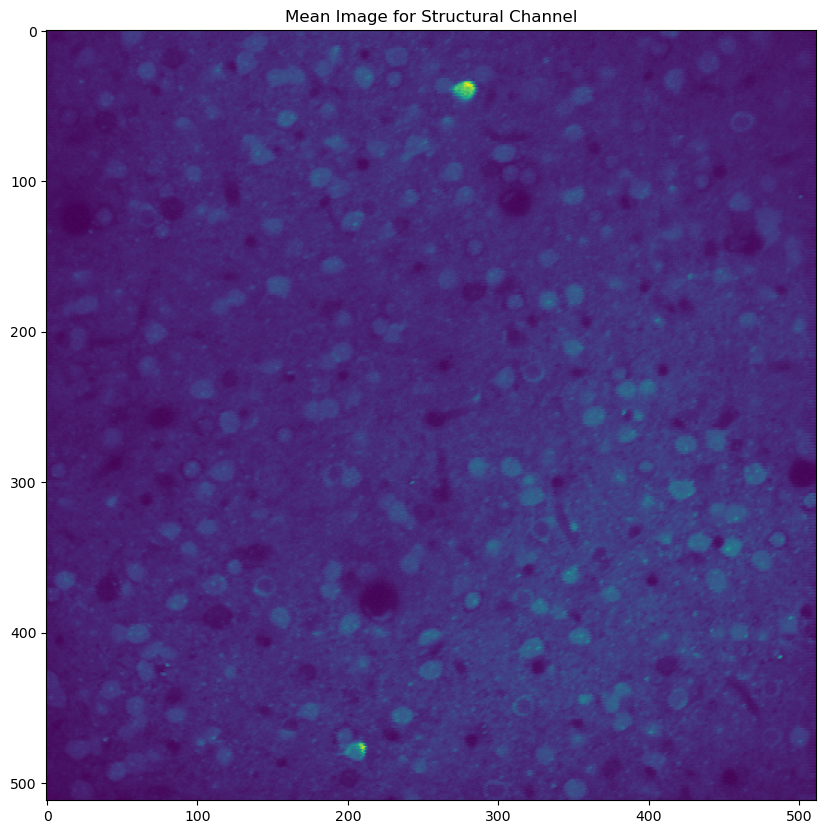

In [9]:
R = cm.load(mc.mmap_file)
mR = R.mean(0)
plt.figure(figsize=(10,10))
plt.imshow(mR)
plt.title('Mean Image for Structural Channel');

### Segmentation of the mean image
CaImAn has an openCV based function for segmenting images like that. You specify the parameter `gSig` which corresponds to an approximation of the radius of the average neuron. The output of this function is a binary matrix with dimensions # of pixels x # of components that can then be used to seed the CNMF algorithm. Each column of the matrix represents the mask of an individual component.

In [10]:
Ain = cm.base.rois.extract_binary_masks_from_structural_channel(mR, gSig=7, expand_method='dilation')[0]

In [11]:
crd = nb_plot_contour(mR, Ain.astype('float32'), mR.shape[0], mR.shape[1], thr=0.99)

## Now run CaImAn batch (CNMF) seeded with the set of the binary masks

To use seeded initialization we pass the set of binary masks in the variable `Ain` when constructing the CNMF object.

The two main parameter changes for the seeded compared to the standard CNMF run are `rf = None` (since the component detection is substituted by the mask and is not run in patches anymore) and `only_init = False` (since the initialization is already being done and deconvolution is necessary). The other parameters can be carried over from the standard pipeline.

Additionally, the expected half size of neurons in pixels `gSig` is very important to be close to the data. ROI detection and separation of the mask as well as CNN evaluation are greatly influenced by `gSig`.

For a general explanation of the parameters see the [general](./demo_pipeline.ipynb) notebook.

In [11]:
# dataset dependent parameters
rf = None                   # half-size of the patches in pixels. Should be `None` when seeded CNMF is used.
only_init = False           # has to be `False` when seeded CNMF is used
gSig = (7, 7)               # expected half size of neurons in pixels, very important for proper component detection

# params object
opts_dict = {'fnames': fname_green,
            'decay_time': 0.4,
            'p': 1,
            'nb': 2,
            'rf': rf,
            'only_init': only_init,
            'gSig': gSig,
            'ssub': 1,
            'tsub': 1,
            'merge_thr': 0.85}

opts.change_params(opts_dict);

      793917 [params.py:       change_params():1150] [1571254] In setting CNMFParams, non-pathed parameters were used; this is deprecated. In some future version of Caiman, allow_legacy will default to False (and eventually will be removed)


#### Load the memory mapped file

In [12]:
Yr, dims, T = cm.load_memmap(mmap_file)
images = np.reshape(Yr.T, [T] + list(dims), order='F') 

#### Restart the cluster to clean up some memory

In [13]:
#%% restart cluster to clean up memory
cm.stop_server(dview=dview)
c, dview, n_processes = cm.cluster.setup_cluster(
    backend='multiprocessing', n_processes=None, single_thread=False)

#### Now construct the object and fit
Note how the matrix of masks is passed in the object.

In [ ]:
cnm_seeded = cnmf.CNMF(n_processes, params=opts, dview=dview, Ain=Ain)
cnm_seeded.fit(images);

spatial support for each components given by the user


### Plot contours against the correlation image

In [ ]:
CI = cm.local_correlations(images.transpose(1,2,0))     #  correlation image
CI[np.isnan(CI)] = 0
cnm_seeded.estimates.plot_contours_nb(img=CI)

From the contour plot above we see that neurons with active spots in the correlation image have been selected by the algorithm. However, there is also a lot of other components with no clear mark in the correlation image. This could corresponds to neurons that are inactive during the experiment or are simply not expressed in the correlation image. These components tend to have non-spiking traces as shown below.

In [ ]:
cnm_seeded.estimates.hv_view_components(img=CI)

## Component filtering
We can apply our quality tests to filter out these components. Components are evaluated by the same criteria:

- the shape of each component must be correlated with the data at the corresponding location within the FOV
- a minimum peak SNR is required over the length of a transient
- each shape passes a CNN based classifier

For the seeded CNMF, this is necessary to eliminate falsely marked ROIs, especially when ROI selection is performed on structural or mean-intensity images.

Experience showed that the CNN classifier might not perform well on manually selected spatial components. If a lot of high-SNR components are rejected, try running the estimation without the CNN (`'use_cnn':False`).

In [ ]:
# parameters for component evaluation
min_SNR = 1.5               # signal to noise ratio for accepting a component
rval_thr = 0.8              # space correlation threshold for accepting a component
min_cnn_thr = 0.99          # threshold for CNN based classifier
cnn_lowest = 0.05           # neurons with cnn probability lower than this value are rejected
#cnm_seeded.estimates.restore_discarded_components()
cnm_seeded.params.set('quality', {'min_SNR': min_SNR,
                           'rval_thr': rval_thr,
                           'use_cnn': True,
                           'min_cnn_thr': min_cnn_thr,
                           'cnn_lowest': cnn_lowest})

#%% COMPONENT EVALUATION
# the components are evaluated in three ways:
#   a) the shape of each component must be correlated with the data
#   b) a minimum peak SNR is required over the length of a transient
#   c) each shape passes a CNN based classifier

cnm_seeded.estimates.evaluate_components(images, cnm_seeded.params, dview=dview)

In [ ]:
cnm_seeded.estimates.plot_contours_nb(img=CI, idx=cnm_seeded.estimates.idx_components)

In [ ]:
## accepted components
cnm_seeded.estimates.hv_view_components(img=CI, idx=cnm_seeded.estimates.idx_components)

In [ ]:
## rejected components
cnm_seeded.estimates.hv_view_components(img=CI, idx=cnm_seeded.estimates.idx_components_bad)

## Comparison with (unseeded) CaImAn batch

In [ ]:
# For comparison, we can also run the unseeded CNMF. For this we have to change the parameters rf and only_init
opts.change_params({'rf': 48, 'K': 12, 'merge_parallel': True})
cnm = cnmf.CNMF(n_processes, params= opts, dview=dview)
cnm = cnm.fit(images)

In [ ]:
#cnm.estimates.restore_discarded_components()
cnm.params.set('quality', {'min_SNR': min_SNR,
                           'rval_thr': rval_thr,
                           'use_cnn': True,
                           'min_cnn_thr': min_cnn_thr,
                           'cnn_lowest': cnn_lowest})

#%% COMPONENT EVALUATION
# the components are evaluated in three ways:
#   a) the shape of each component must be correlated with the data
#   b) a minimum peak SNR is required over the length of a transient
#   c) each shape passes a CNN based classifier

cnm.estimates.evaluate_components(images, cnm.params, dview=dview)

In [ ]:
cnm.estimates.plot_contours_nb(img=CI, idx=cnm.estimates.idx_components)

### Select only high quality components and compare two approaches

This updates the `estimates` object by only keeping the components indexed by idx_components. Components from idx_components_bad are removed. This makes indexing the `estimates` object as seen in the cells above unnecessary and non-effective. Rejected components can be recovered with the `restore_discarded_components()` function, as long as `select_components()` has not been called with `save_discarded_components=False`.

The set of accepted components is largely the same in both cases. We can quantify this comparison by using the `register_ROIs` function to register the components against each other. Before doing that, the spatial footprints need also to be thresholded to remove any faint tails.

In [ ]:
cnm.estimates.select_components(use_object=True)   # select only the accepted components
cnm_seeded.estimates.select_components(use_object=True)
cnm.estimates.threshold_spatial_components()
cnm_seeded.estimates.threshold_spatial_components()
res = cm.base.rois.register_ROIs(cnm.estimates.A_thr, cnm_seeded.estimates.A_thr, CI.shape,
                                 align_flag=False, plot_results=True)
print(res[4])

## Seeding CaImAn online algorithm
The same procedure can also be followed for the CaImAn online algorithm. Seeding can be done by passing the binary mask in the `estimates.A` field of the `OnACID` object and then calling the `fit` method:
```
cnm_on = cnmf.online_cnmf.OnACID(params=opts)
cnm_on.estimates.A = Ain
cnm_on.fit_online()
```

## Some info on creating your own binary seeding mask

To run a seeded CNMF, we have to provide the algorithm with directions on where it has to look for neurons. This can be done by creating a binary mask with the same dimensions as the movie, which marks possible neuron locations with `True` or `1`.

To manually determine neuron locations, a template on which to find neurons has to be created. This template can be constructed with two different methods:
1. **Structural channel and average intensity:** If your recording incorporates a calcium-independent structural channel, it can be used to extract locations of neurons by averaging the intensity of each pixel over time. This method can also be applied to the calcium-dependent channel itself. The averaging greatly reduces noise, but any temporal component is eliminated, and it is impossible to tell whether a neuron was active or inactive during the recording. Thus, many neurons selected through this technique will be false positives, which should be filtered out during the component evaluation.
2. **Local correlations:** The arguably more accurate template can be the local correlation image of the calcium-dependent signal. Here, each pixel's value is not determined by it's intensity, but by its intensity **correlation** to its neighbors. Thus, groups of pixels that change intensity together will be brighter. This method incorporates the temporal component of the signal and accentuates firing structures like neurons and dendrites. Features visible in the local correlation image are likely functional units (such as neurons), which is what we are ultimately interested in. The number of false positives should be lower than in method 1, as structural features visible in mean-intensity images are greatly reduced. Additionally, it reduces the donut shape of some somata, making neuron detection easier.

A binary seeding mask from this template can be created automatically or manually:
1. **Automatic:** The CaImAn function `extract_binary_masks_from_structural_channel()` does basically what it says. It extracts binary masks from a movie or an image with the Adaptive Gaussian Thresholding algorithm provided by the OpenCV library. If the function is provided a movie, it applies the thresholding on the average intensity image of this movie.
2. **Manual:** Raw movies, average intensity images or local correlation images can be loaded into Fiji to manually select ROIs. Average intensity images can be created from a raw movie with through `Image → Stacks → Z Project...`. Manually creating a binary mask in Fiji is described in the next cell. 

This notebook demonstrates the seeding with a mask manually created from a local correlations image. The automatic method is displayed, but commented out to avoid confusion. 

In [ ]:
from scipy import ndimage as ndi
from skimage.io import imsave, imread
from skimage.morphology import dilation
from skimage.segmentation import find_boundaries, watershed

# Create local correlations image and save it
# swap_dim should be set to True if the movie is in MATLAB format (time is last instead of first axis)
Cn = cm.local_correlations(images, swap_dim=False)
Cn[np.isnan(Cn)] = 0
save_path = fnames[0].split('.')[0] + '_local_corr.png'
imsave(save_path,Cn)

'''
# Create image from structural or functional channel and check automatically extracted contours
fname = "filepath"
Ain, mR = cm.base.rois.extract_binary_masks_from_structural_channel(
    cm.load(fname), expand_method='dilation', selem=np.ones((1, 1)))
plt.figure()
crd = cm.utils.visualization.plot_contours(Ain.astype('float32'), mR, thr=0.99, display_numbers=False)
plt.title('Contour plots of detected ROIs in the structural channel')
'''

Now that we have our local correlation image, we can manually select ROIs with Fiji. For this, open the image in Fiji/ImageJ and draw the outline of a potential neuron with the `Freehand selections` tool. Then, add the current selection to the ROI manager with `t` (Mac and Windows). Please note that for proper ROI detection, make sure that features cut off at the edge have a ROI that touches the edge as well.

Neurons in the imaged tissue can lie in different depths, thus their ROIs and calcium signals can overlap.
The best solution to account for this is to create one mask for each component. ROIs can be saved as binary masks through `Edit → Selection → Create mask`. Fiji's macro function can help to automatically save individual ROIs as binary images. This preserves original neuron shapes and potential overlaps. CaImAn recognizes pixels that are shared by multiple components and takes this into account when extracting the calcium signal from these regions. It is thus recommended to retain overlapping ROIs when seeding the CNMF.

Alternatively, individual selections can be combined in Fiji and exported together. Then, overlapping ROIs will be separated afterwards with a watershed algorithm (see below).

## Extracting spatial components from binary masks
The CNMF object stores spatial components in a sparse column format (`csc_matrix`) with n rows (number of pixels of the flattened image) and m columns (number of components). Thus, single ROIs have to be extracted and transformed into individual binary masks.

## Loading separate masks for each component (recommended)

If each component ROI has been saved in its own mask, they can be loaded and transformed into the `csc_matrix` format individually. This method is recommended, as it retains the original shapes of neurons, and the algorithm takes pixels shared across multiple components into account during signal extraction.

In this demo it is assumed that individual binary .png masks are stored in one directory.

In [ ]:
# Choose expand method and morphological element of expansion. Dilation of masks provides more room for error
# and ensures that the complete neuron is included
expand_method = 'dilation'
selem = np.ones(3,3)

# Set the path of the individual masks. Adapt file extension if masks are not saved as .png
dir_path = 'path of directory with masks'
file_list = glob(dir_path+'/*.png')

for i in range(len(file_list)):
    # temporarily save the current mask as a boolean array
    temp = np.asarray(imageio.imread(file_list[i]), dtype=bool)
    
    # the csc_matrix has to be initialized before adding the first mask
    if i == 0:
        A = np.zeros((np.prod(temp.shape), len(file_list)), dtype=bool)
        
    # apply dilation or closing to the mask (optional)
    if expand_method == 'dilation':
        temp = dilation(temp, selem=selem)
    elif expand_method == 'closing':
        temp = dilation(temp, selem=selem)

    # flatten the mask to a 1D array and add it to the csc_matrix
    A[:, i] = temp.flatten('F')

## Loading one mask that includes all components (not recommended)
If the masks for all components have been saved in one file, some more processing is required to separate ROIs for each component. Since now overlapping components result in fused ROIs, they have to be separated with a watershed algorithm before being passed into the csc_matrix. This is not recommended because information of which pixels are shared by multiple components is lost, which leads to contamination of the signal from one component to the other at shared pixels. Furthermore, the additional processing step decreases the precision due to imperfect ROI separation.

If you have separate masks and do not need this step, skip the next cells until `Perform seeded CNMF`.

### Identify individual features
To run the watershed algorithm, we have to label each individual component. To separate overlapping features, a distance matrix can be calculated, where pixels get a value representing their distance to the nearest edge. This creates local maxima in the center of features which are not overlapping with nearby features. To account for irregularly shaped cells that would create more than one local maximum, the expected cell diameter `gSig_seed` is used to threshold local maxima, merging local maxima that are closer together than the cell radius.

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 10]

# load binary mask
mask = np.asarray(imread('/Users/hheiser/Desktop/testing data/file_00020_no_motion/avg_mask_fixed.png'), dtype=bool)

# calculate distances from nearest edge
distances = ndi.distance_transform_edt(mask)

# apply threshold of expected cell diameter gSig_seed to get one maximum per cell
gSig_seed = 20
local_max = distances.copy()
local_max[local_max >= gSig_seed/2] = gSig_seed
local_max[local_max < gSig_seed/2] = 0
local_max = local_max.astype('bool')

# visualize original mask, distance matrix and thresholded local maxima
fig, ax = plt.subplots(1,3)
plt.sca(ax[0])
plt.imshow(mask)
plt.gca().set_title('Original mask')
plt.sca(ax[1])
plt.imshow(distances)
plt.gca().set_title('Distance matrix')
plt.sca(ax[2])
plt.imshow(local_max)
plt.gca().set_title('Local maxima')
plt.show()

### Separate components with watershed algorithm
Now that we have the location of separated features, but we still have to apply this separation to the original mask to preserve its shape as much as possible. For this we label the local maxima individually to prepare them for the watershed algorithm. Some irregularly shaped cells will have multiple maxima, even after the thresholding done in the previous step. We should thus remove very small features. These cleaned-up labels can then be used to apply watershed to the original image. Now the watershed algorithm knows where the individual components are and calculates smooth boundaries between them.

In [ ]:
# generate labels of isolated maxima
markers = ndi.label(local_max)[0]

# remove very small features (avoids irregular cells being counted multiple times)
sizes = np.bincount(markers.ravel())      # get list of number of pixels of each label
mask_sizes = sizes > 5                    # remove labels with very low pixel counts
mask_sizes[0] = 0                         # remove count of background label
local_max_cleaned = mask_sizes[markers]   # apply mask to binary image to only keep large components

# update labels with cleaned-up features
markers_cleaned = ndi.label(local_max_cleaned)[0]

# apply watershed to the original binary mask using the cleaned labels to create separated ROIs
labels = watershed(-distances, markers_cleaned, mask=mask)

# visualize separated labels after watershed (each feature has a slightly different color)
plt.imshow(labels)
plt.title('Labels of features separated by watershed algorithm')
plt.show()

### Bring labels into sparse column format that CNMF can use
Now we have each component marked with a different label, even if their ROIs are overlapping or merged. We can use this matrix to bring it into the sparse column format that the CNMF uses to store spatial components. Each of the labelled features will be extracted separately and used as the spatial component for this neuron.

In [ ]:
# initialize sparse column matrix
num_features = np.max(labels)
A = np.zeros((labels.size, num_features), dtype=bool)

# save each component individually into the sparse column matrix
for i in range(num_features):
    temp = (labels == i + 1)                     # each feature is saved as a single component in its own frame
    temp = dilation(temp, selem=np.ones((3,3)))  # dilate spatial component to increase error margin a bit

    # parse the current component 'temp' into the sparse column matrix
    A[:, i] = temp.flatten('F')